# 군집화(Clustering) - K means 알고리즘

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### iris 데이터 군집화

In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
# 데이터 불러오기 및 표준화, 차원 축소
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

In [7]:
from sklearn.cluster import KMeans
KMeans().get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [9]:
# 비지도 학습 시키기
kmeans = KMeans(n_clusters = 3, random_state=2022)
kmeans.fit(iris_std) # 비지도학습이므로 y값을 제공하지 않는다.

KMeans(n_clusters=3, random_state=2022)

In [10]:
# 학습 결과
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [11]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([53, 50, 47]))

In [15]:
df = pd.DataFrame({ 'PC1': iris_pca[:,0], 'PC2': iris_pca[:,1],'target': iris.target, 'cluster': kmeans.labels_})
df.head(55).tail(5)

,PC1,PC2,target,cluster
50,1.101781,0.862972,1,2
51,0.731337,0.594615,1,2
52,1.240979,0.616298,1,2
53,0.407483,-1.754404,1,0
54,1.075475,-0.208421,1,0


In [17]:
# 데이터 분석
df.groupby(['target', 'cluster'])[['PC1']].count()

PC1
target cluster     
0      1         50
1      0         39
       2         11
2      0         14
       2         36

 - 군집 결과 시각화

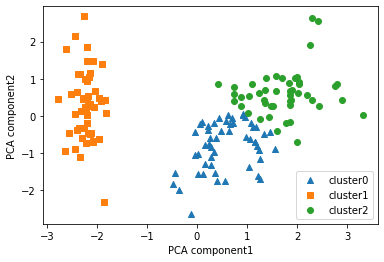

In [18]:
markers = ['^','s', 'o']

for i, marker in enumerate(markers):
  x_data = df[df.cluster == i]['PC1']
  y_data = df[df.cluster == i]['PC2']
  plt.scatter(x_data, y_data, marker = marker, label = 'cluster'+str(i))

plt.legend()
plt.xlabel('PCA component1'), plt.ylabel('PCA component2')
plt.show() 

 - 원본 데이터와 군집화된 데이터 비교

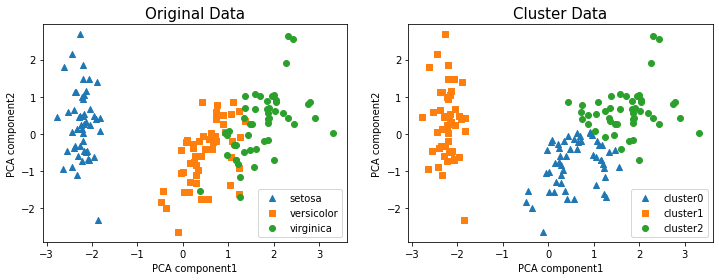

In [22]:
# 원본 데이터와 비교
plt.figure(figsize=(12,4))
for k, column in enumerate(['target', 'cluster']): # target은 원본, cluster는 군집화된 데이터
  plt.subplot(1, 2, k+1)

  for i, marker in enumerate(markers): # 각 품종마다 마커를 찍는 부분
    x_data = df[df[column] == i]['PC1'] # df의 칼럼 내 PC1을 x축
    y_data = df[df[column] == i]['PC2'] # df의 칼럼 내 PC2를 y축
    
    if k == 0: 
      plt.title('Original Data', fontsize=15)
      plt.scatter(x_data, y_data, marker = marker, label = iris.target_names[i])
    
    else:
      plt.title('Cluster Data', fontsize=15)
      plt.scatter(x_data, y_data, marker = marker, label = 'cluster'+str(i))

  plt.legend()
  plt.xlabel('PCA component1'), plt.ylabel('PCA component2')

plt.show() 